![](TN-comunidades-Instituto-Tecnologico-de-Durango.png)
 
    
# Inteligencia Artificial
## Arboles de Decision Dataset COVID-19

## Nombre del docente 
### Jose Gabriel Rodriguez Rivas

## Nombre del alumno
### Oswaldo Zura Alvarado

#### Paso 1.- Cargar los datos

In [1]:
#import pandas
import pandas as pd

#Creamos un dataframe pandas llamado "covid", llamando al archido "COVID19MEXICO"
covid = pd.read_csv('COVID19MEXICO.csv',  encoding= 'latin1')

In [2]:
#Con el comando head mostramos las primeras 5 filas de la tabla
covid.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-07-23,1162e9,2,4,9,2,20,9,2,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
1,2020-07-23,0e50ac,2,4,9,2,9,9,5,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
2,2020-07-23,1dd91c,2,4,8,1,8,8,37,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
3,2020-07-23,1ad302,2,4,30,1,30,30,44,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,2020-07-23,1dd6f1,2,3,15,2,15,15,106,2,...,2,2,2,2,1,1,99,MÃ©xico,99,2


In [3]:
#Verificamos en contenido de la tabla
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879608 entries, 0 to 879607
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   FECHA_ACTUALIZACION  879608 non-null  object
 1   ID_REGISTRO          879608 non-null  object
 2   ORIGEN               879608 non-null  int64 
 3   SECTOR               879608 non-null  int64 
 4   ENTIDAD_UM           879608 non-null  int64 
 5   SEXO                 879608 non-null  int64 
 6   ENTIDAD_NAC          879608 non-null  int64 
 7   ENTIDAD_RES          879608 non-null  int64 
 8   MUNICIPIO_RES        879608 non-null  int64 
 9   TIPO_PACIENTE        879608 non-null  int64 
 10  FECHA_INGRESO        879608 non-null  object
 11  FECHA_SINTOMAS       879608 non-null  object
 12  FECHA_DEF            879608 non-null  object
 13  INTUBADO             879608 non-null  int64 
 14  NEUMONIA             879608 non-null  int64 
 15  EDAD                 879608 non-nu

In [5]:
#con esta instruccion vemos las primeras 13 columnas para ver los datos de la clumna "FECHA_DEF"
covid.iloc[:, 0:13]

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF
0,2020-07-23,1162e9,2,4,9,2,20,9,2,1,2020-03-23,2020-03-22,9999-99-99
1,2020-07-23,0e50ac,2,4,9,2,9,9,5,2,2020-04-13,2020-04-04,9999-99-99
2,2020-07-23,1dd91c,2,4,8,1,8,8,37,2,2020-04-15,2020-04-10,2020-04-19
3,2020-07-23,1ad302,2,4,30,1,30,30,44,1,2020-04-27,2020-04-17,9999-99-99
4,2020-07-23,1dd6f1,2,3,15,2,15,15,106,2,2020-06-06,2020-06-01,9999-99-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879603,2020-07-23,1af1ae,1,12,19,2,19,19,39,1,2020-07-02,2020-07-01,9999-99-99
879604,2020-07-23,193226,1,3,26,2,26,26,30,2,2020-07-09,2020-07-02,9999-99-99
879605,2020-07-23,0fe94e,2,12,24,1,24,24,28,1,2020-07-16,2020-07-09,9999-99-99
879606,2020-07-23,118851,2,12,9,1,9,9,5,1,2020-07-16,2020-07-11,9999-99-99


#### Paso 2: Preparar los datos para el modelo de árbol de decisiones

In [7]:
#Utilizamos esta instruccion para cambiar los datos de la columna "FECHA_DEF" por ceros y unos
covid["Curados"] = covid["FECHA_DEF"].apply(lambda toLabel: 0 if toLabel == '9999-99-99' else 1)

In [8]:
#Volvemos a mostra las 13 columnas para ver los cambios en "FECHA_DEF"
covid.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Curados
0,2020-07-23,1162e9,2,4,9,2,20,9,2,1,...,2,2,2,99,1,99,MÃ©xico,99,97,0
1,2020-07-23,0e50ac,2,4,9,2,9,9,5,2,...,1,2,2,99,1,99,MÃ©xico,99,2,0
2,2020-07-23,1dd91c,2,4,8,1,8,8,37,2,...,1,2,2,99,1,99,MÃ©xico,99,2,1
3,2020-07-23,1ad302,2,4,30,1,30,30,44,1,...,2,2,2,99,1,99,MÃ©xico,99,97,0
4,2020-07-23,1dd6f1,2,3,15,2,15,15,106,2,...,2,2,2,1,1,99,MÃ©xico,99,2,0


#### Paso 3: Entrenar y calificar el modelo del árbol de decisiones.

In [9]:
#Creamos una matriz para los valores a utilizar
y_target = covid["Curados"].values

In [10]:
#Creamos la variable para contener las características que usará el clasificador
Columnas = ["SEXO", "EDAD", "EMBARAZO", "DIABETES","EPOC","ASMA","INMUSUPR","HIPERTENSION","CARDIOVASCULAR",
           "OBESIDAD","RENAL_CRONICA","TABAQUISMO","INTUBADO","NEUMONIA","UCI"]
X_input = covid[list(Columnas)].values

In [11]:
#Importamos el modulo del arbol para la libreria sklear
from sklearn import tree
#Se crea clf_covid como un objeto clasificador de árbol de decisión
clf_covid = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
#Entrenar el modelo utilizando el método fit () del objeto del árbol de decisión.
#Suministre el método con la variable de entrada X_input y la variable de destino y_target
clf_covid = clf_covid.fit(X_input, y_target)

In [12]:
clf_covid.score(X_input,y_target)

0.9433054269629199

#### Paso 4: Visualizar el árbol

In [13]:
clasificacion = ['NO CURADO', 'CURADO']

In [16]:
from sklearn.externals.six import StringIO
with open("Covid.dot", 'w') as f:
  f = tree.export_graphviz(clf_covid, out_file=f, feature_names=Columnas,
                           class_names =clasificacion)

In [17]:
#Ejecutamos el comando de punto Graphviz para convertir el archivo .dot a .png
!dot -Tpng Covid.dot -o Covid.png

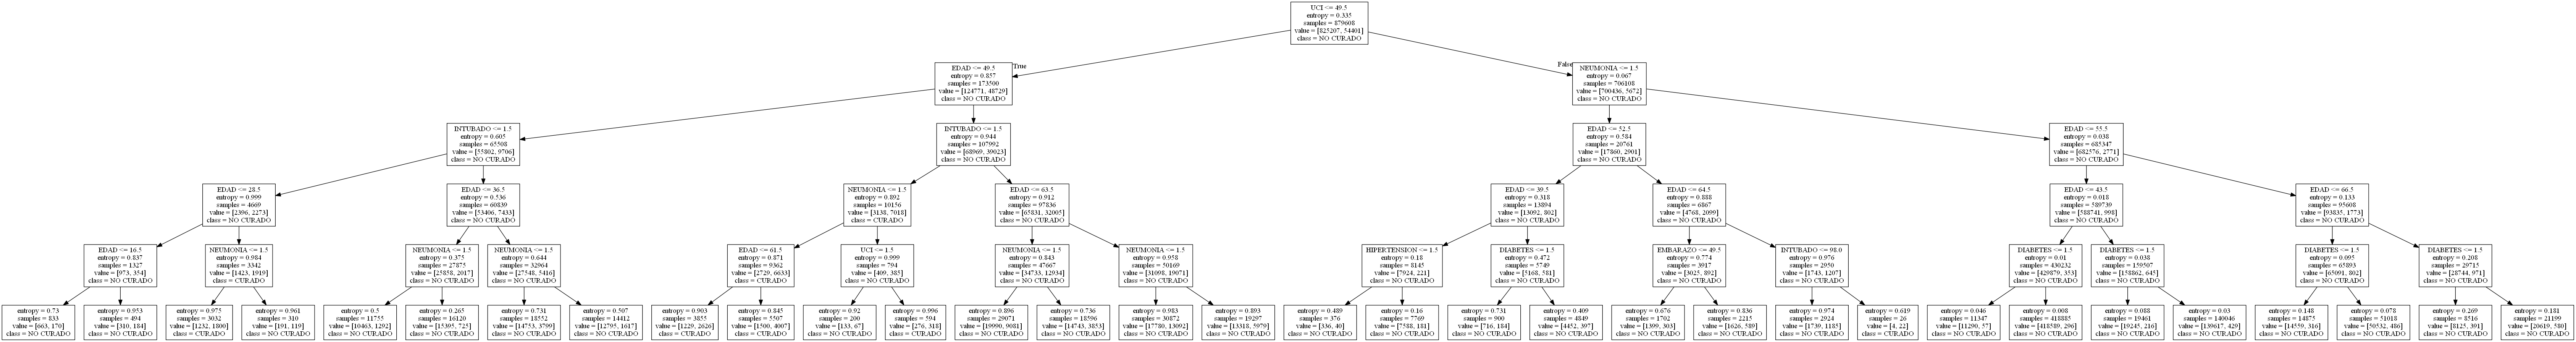

In [18]:
#Importamos el módulo de imagen desde la biblioteca Ipython.display
from IPython.display import Image
#Luego mostramos el grafico del arbol de decision
Image("Covid.png")

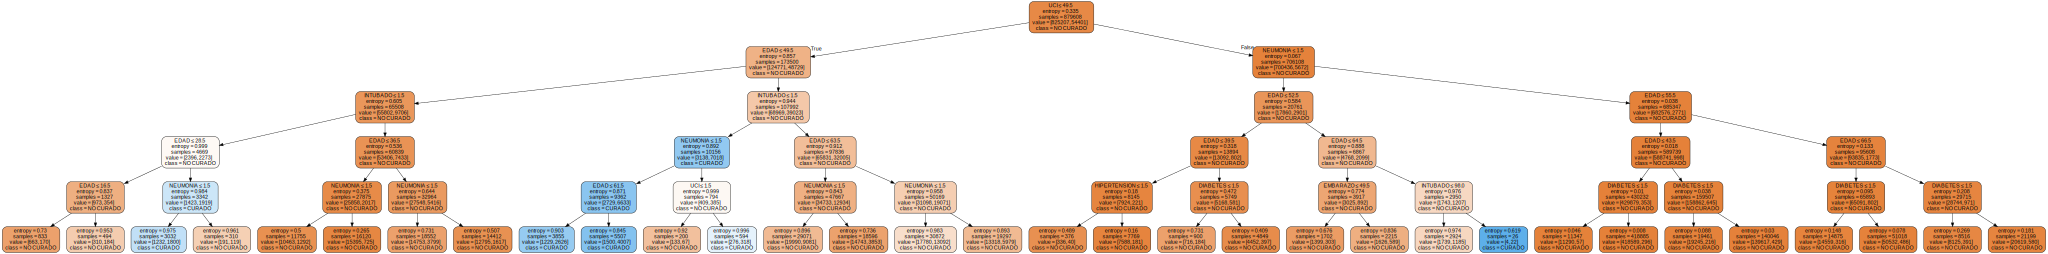

In [22]:
import graphviz
dot_data=tree.export_graphviz(clf_covid, out_file=None,
                              class_names =clasificacion,
                             feature_names =Columnas,
                             filled=True, rounded=True,
                             special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("CovidCOLOR", format='png')
graph

#### Paso 4: Aplicamos los mismos pasos
Se realizara la aplicacion de los mismos pasos pero ahora sin las columnas de : INTUBADO, NEUMONIA, UCI

In [23]:
#Creamos una matriz para los valores a utilizar
y_target = covid["Curados"].values

In [24]:
#Creamos la variable para contener las características que usará el clasificador
Columnas = ["SEXO", "EDAD", "EMBARAZO", "DIABETES","EPOC","ASMA","INMUSUPR","HIPERTENSION","CARDIOVASCULAR",
           "OBESIDAD","RENAL_CRONICA","TABAQUISMO"]

X_input = covid[list(Columnas)].values

In [25]:
#Importamos el modulo del arbol para la libreria sklear
from sklearn import tree
#Se crea clf_covid como un objeto clasificador de árbol de decisión
clf_covid = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
#Entrenar el modelo utilizando el método fit () del objeto del árbol de decisión.
#Suministre el método con la variable de entrada X_input y la variable de destino y_target
clf_covid = clf_covid.fit(X_input, y_target)

In [26]:
clf_covid.score(X_input,y_target)

0.9381531318496421

In [27]:
clasificacion = ['NO CURADO', 'CURADO']

In [29]:
from sklearn.externals.six import StringIO
with open("Covid19.dot", 'w') as f:
  f = tree.export_graphviz(clf_covid, out_file=f, feature_names=Columnas,
                           class_names=clasificacion)

In [30]:
#Ejecutamos el comando de punto Graphviz para convertir el archivo .dot a .png
!dot -Tpng Covid19.dot -o Covid19.png

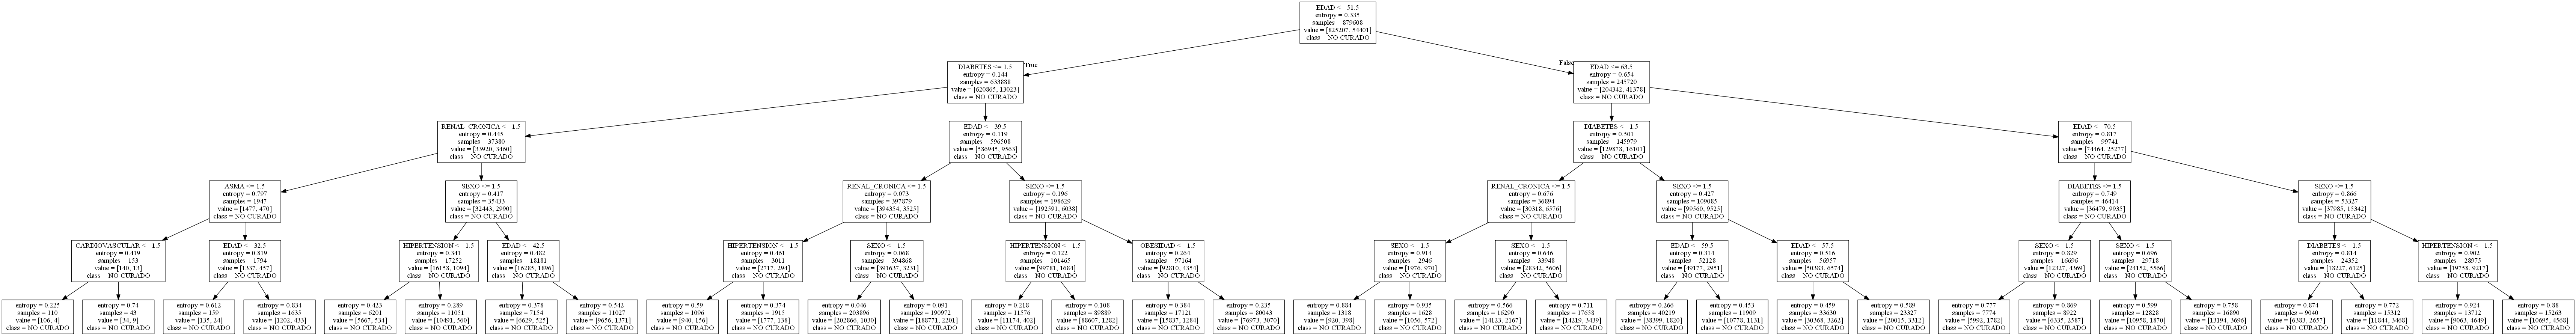

In [31]:
#Importamos el módulo de imagen desde la biblioteca Ipython.display
from IPython.display import Image
#Luego mostramos el grafico del arbol de decision
Image("Covid19.png")

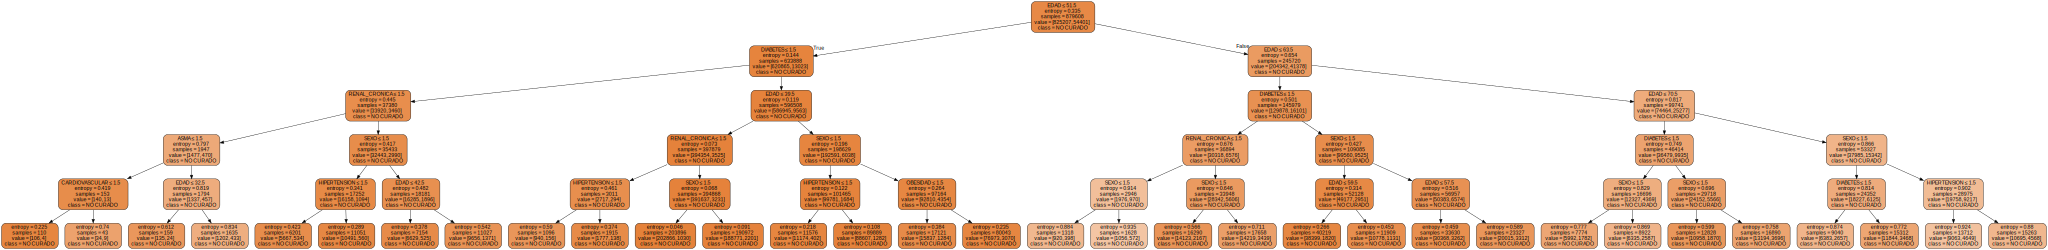

In [32]:
import graphviz
dot_data=tree.export_graphviz(clf_covid, out_file=None,
                              class_names =clasificacion,
                             feature_names =Columnas,
                             filled=True, rounded=True,
                             special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("Covid19COLOR", format='png')
graph

**Conclusion**
Los Arboles de decision pueden ser de gran ayuda en cierto tipo de cituciones, ya que ayudan a poder tomar deciciones lo mas rapido posible a demas con una respuesta justificada, en esta practica pudimos observar los sobreviviventes del covid-19, para lograr hacer el arbol creamos una columna que estuviera evaluando el arbol en este caso llamada"Curados", la cual la obtuvimos con la funcion lambda y con la columna de la tabla que se llama FECHA_DEF, con estos datos pudimos cambiar los valores de la coumna a ceros y unos para que sea mas sencilla la evaluacion. Al realizar la evaluacion del primer arbol tomamos en cuenta las columnas UCI, Neumonia e INTUBADO ademas de todas las demas columnas la cual nos arrojo una presicion de "0.9433054269629199", en el arbol pudimos observar que el dato que determina es el UCI teniendo como raices a la edad y la neumonia, despues evaluamos el arbol sin las columnas de UCI, Neumonia e INTUBADO se puede apreciar que se perdio la un poco la precicion ya que no arrojo "0.9381531318496421" ademas de que el arbol cambio teniendo como referencia la edad y como raices la diabetes, en general se puede observar la importancia de lo que puede ser un dato o una columna a la hora de realizar un arbol de decisiones, ya que es importante saber que se pretende saber a la hora de la creacion del arbol, ya que un dato que este mal o que tenga valores nulos puede cambiar la precicion y el resultado del arbol.